In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np 
from statsmodels.nonparametric.kernel_regression import KernelReg

In [4]:
plt.rcParams.update({'font.size' : 18})

In [5]:
url = "https://data.bts.gov/resource/crem-w557.json"
df = pd.read_json(url)

In [6]:
df

,index,date,general_economic_indicators,safety_general_aviation,air_safety_air_carrier_fatalities,heavy_truck_sales,light_truck_sales,auto_sales,heavy_truck_sales_saar_millions,light_truck_sales_saar_millions,...,system_use_u_s_airline,u_s_airline_traffic_total_non_seasonally_adjusted,u_s_airline_traffic_international_non_seasonally_adjusted,u_s_airline_traffic_domestic_non_seasonally_adjusted,system_use_highway_vehicle_4,system_use_highway_vehicle_3,system_use_highway_vehicle_2,system_use_highway_vehicle_1,system_use_highway_vehicle,u_s_marketing_air_carriers_on_time_performance_percent
0,0,1947-01-01,2.182681e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1947-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1947-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1947-04-01,2.176892e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1947-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,929,2024-06-01,NaN,38.0,0.0,38100.0,1063400.0,248900.0,442000.0,12299000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,930,2024-07-01,NaN,52.0,0.0,42200.0,1032300.0,243200.0,517000.0,12760000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,931,2024-08-01,NaN,17.0,0.0,43500.0,1153700.0,265500.0,501000.0,12343000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
932,932,2024-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df = df[['date','auto_sales']].dropna()
df = df[df.date >= pd.to_datetime("2000-01-01")]

In [8]:
df

,date,auto_sales
636,2000-01-01,616700.0
637,2000-02-01,763500.0
638,2000-03-01,830200.0
639,2000-04-01,770000.0
640,2000-05-01,828000.0
...,...,...
927,2024-04-01,257600.0
928,2024-05-01,277600.0
929,2024-06-01,248900.0
930,2024-07-01,243200.0


In [9]:
df.auto_sales = df.auto_sales/1000

In [10]:
df

,date,auto_sales
636,2000-01-01,616.7
637,2000-02-01,763.5
638,2000-03-01,830.2
639,2000-04-01,770.0
640,2000-05-01,828.0
...,...,...
927,2024-04-01,257.6
928,2024-05-01,277.6
929,2024-06-01,248.9
930,2024-07-01,243.2


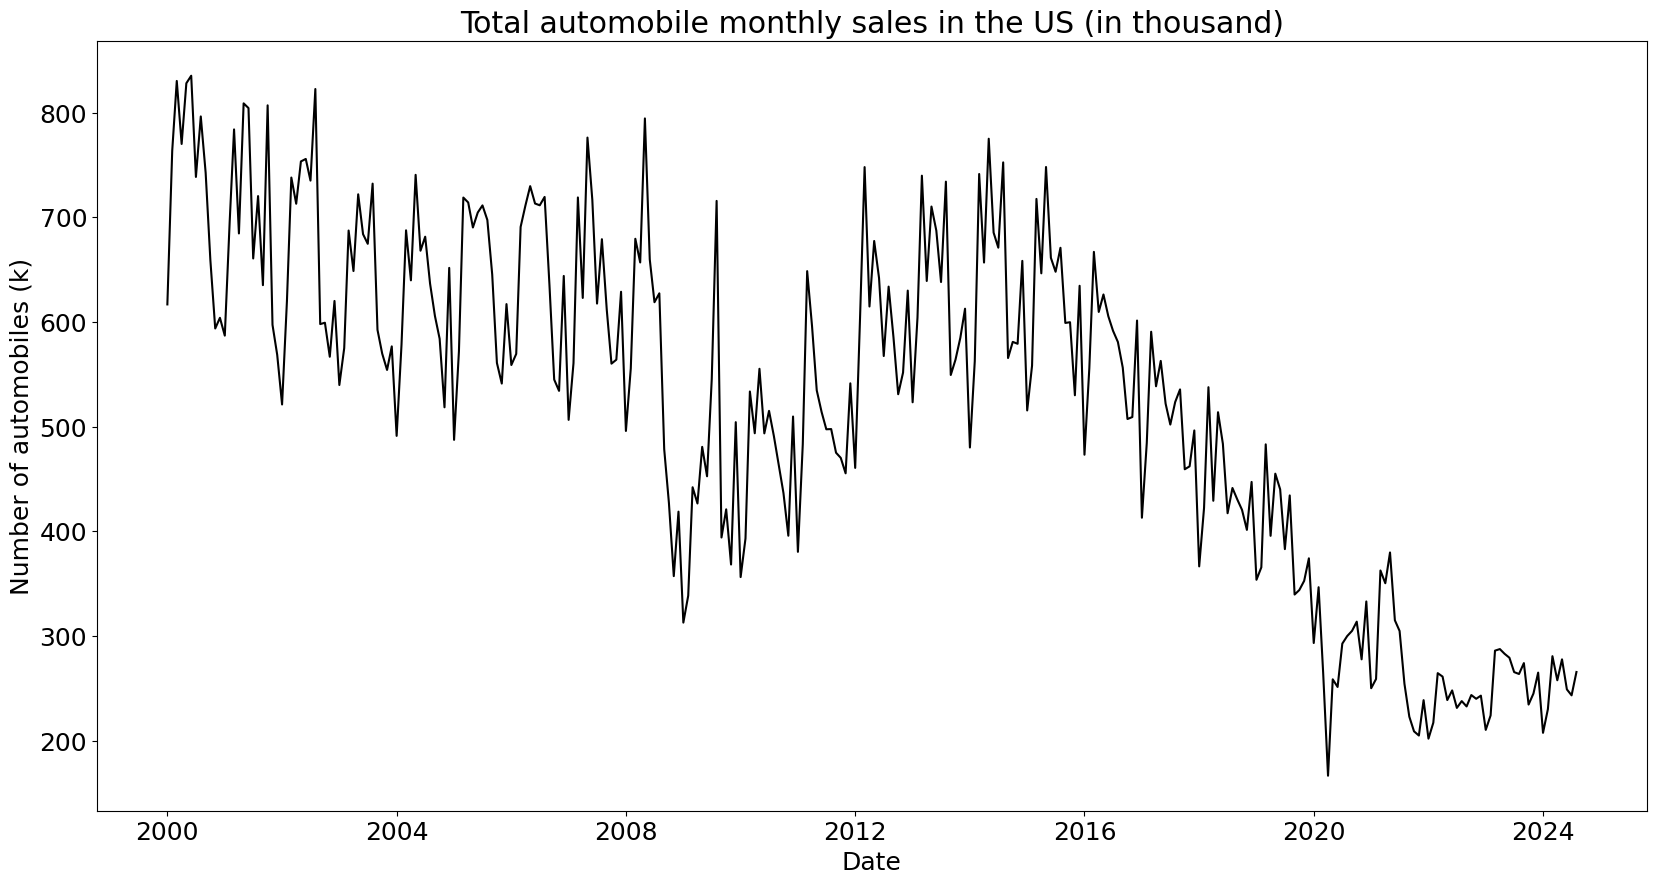

In [34]:
%matplotlib inline
plt.figure(figsize=(20,10), dpi=100)
plt.plot(df.date, df.auto_sales, color='k')
plt.gca().set(title='Total automobile monthly sales in the US (in thousand)', \
    xlabel='Date', ylabel='Number of automobiles (k)')
plt.show()

In [12]:
T = len(df.auto_sales)

In [14]:
kr = KernelReg(df.auto_sales,np.arange(T),'c',bw=[7])
y_pred, y_std = kr.fit(np.arange(T)) 

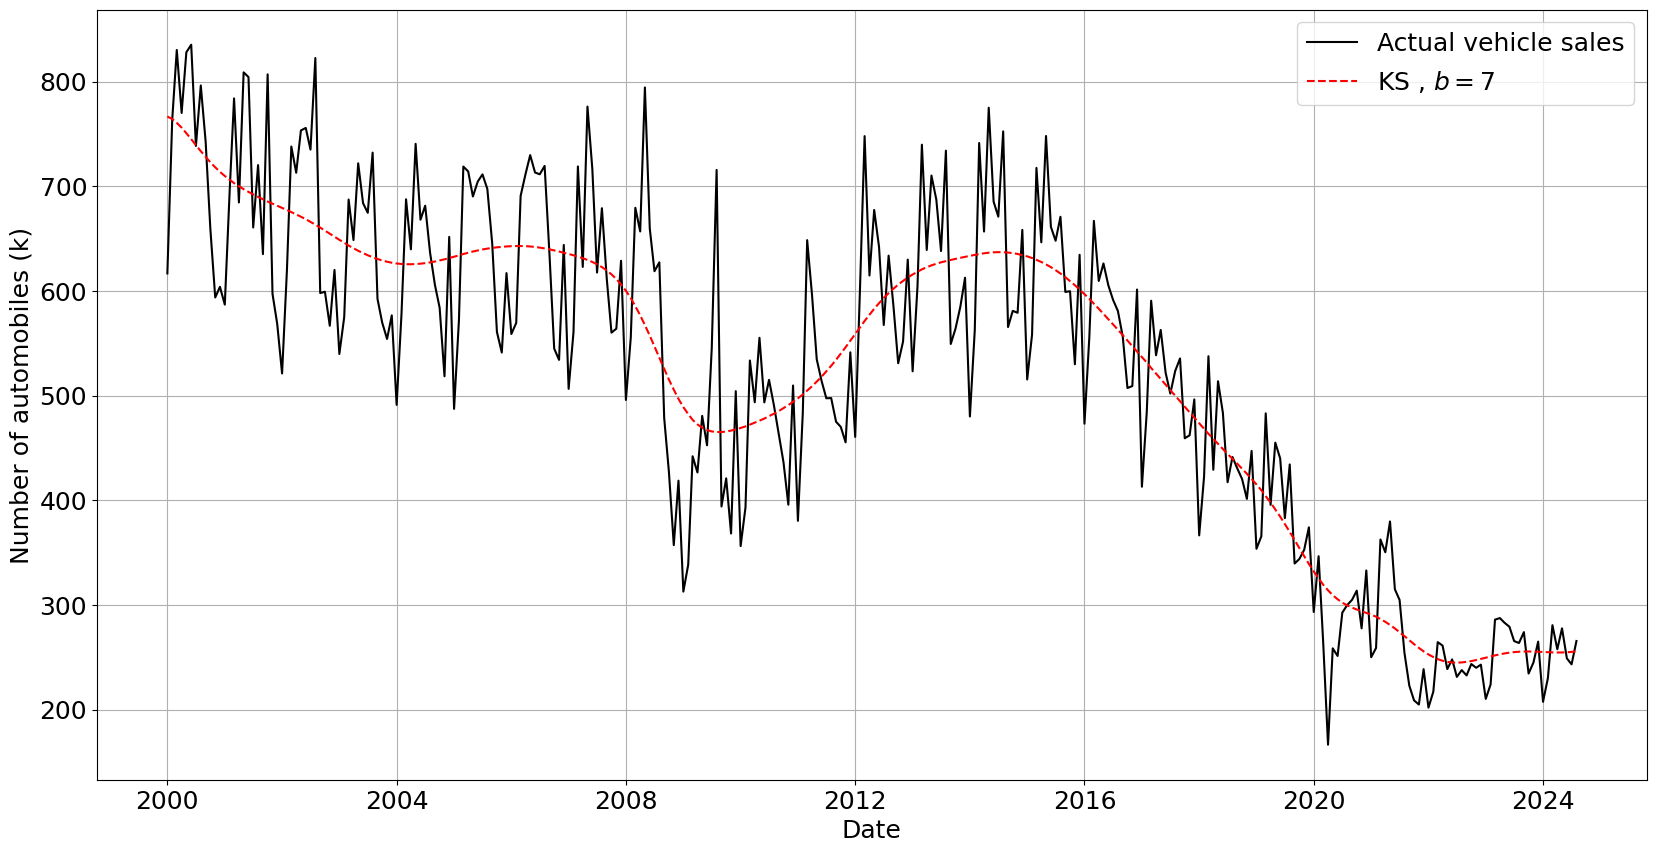

In [33]:
plt.figure(figsize=(20,10), dpi=100)
plt.plot(df.date,df.auto_sales, \
    color='k',label='Actual vehicle sales')


plt.plot(df.date, y_pred, '--', \
    color = 'red', label = 'KS , $b = 7$')

plt.gca().set(xlabel='Date', \
    ylabel='Number of automobiles (k)')

plt.legend()
plt.grid()
plt.show()

In [29]:
detrended_data = df.auto_sales - y_pred

D = pd.get_dummies(pd.DatetimeIndex(df.date).month)

regressors = D.to_numpy()

model = sm.OLS(detrended_data,regressors)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             auto_sales   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     38.52
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           4.98e-50
Time:                        14:16:48   Log-Likelihood:                -1540.0
No. Observations:                 296   AIC:                             3104.
Df Residuals:                     284   BIC:                             3148.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -105.5673      8.980    -11.756      0.0

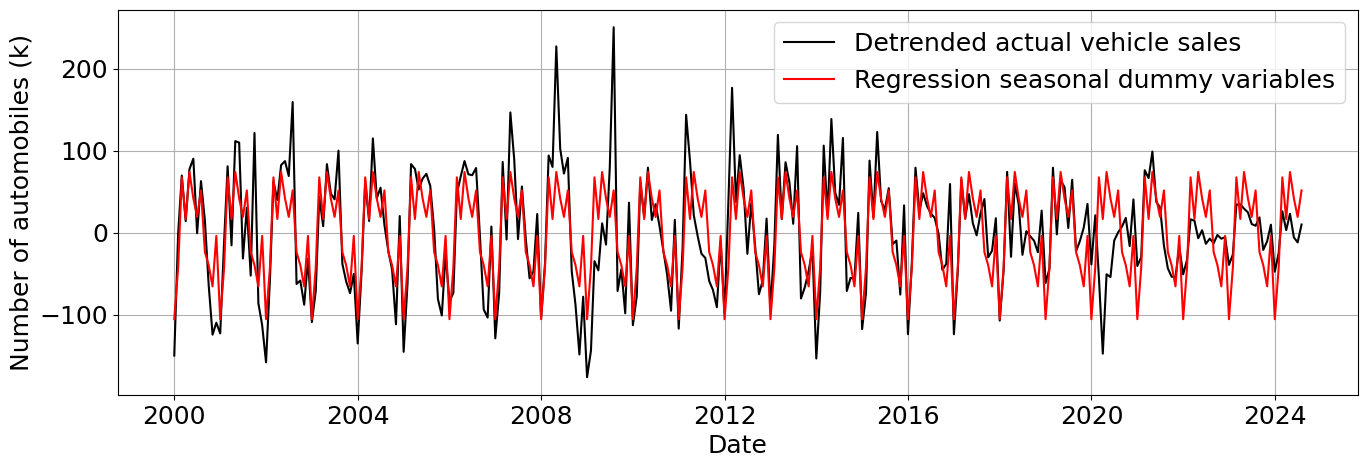

In [31]:
plt.figure(figsize=(16,5), dpi=100)

plt.plot(df.date,detrended_data,color='k', \
    label = 'Detrended actual vehicle sales')

plt.plot(df.date,results.fittedvalues, \
    color='red', label = 'Regression seasonal dummy variables')

plt.gca().set(xlabel='Date', \
              ylabel='Number of automobiles (k)')
plt.legend()
plt.grid()
plt.show()

In [35]:
D

,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
291,False,False,False,True,False,False,False,False,False,False,False,False
292,False,False,False,False,True,False,False,False,False,False,False,False
293,False,False,False,False,False,True,False,False,False,False,False,False
294,False,False,False,False,False,False,True,False,False,False,False,False
